## Several fits

## General

In [14]:
import pandas as pd
from scipy import optimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fmax']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Linear

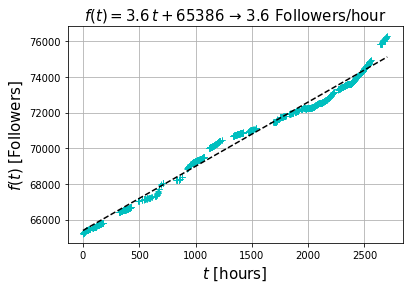

In [20]:
def line(x,m,b):
    return m*x+b

df=pd.read_json('followers.json')
df=df.iloc[-1500:].reset_index(drop=True)
#df=df[-20:].reset_index(drop=True)

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
#df=df[df['hours']>850].reset_index(drop=True)

plt.plot(df['hours'],df['followers'],'c+')

#Fit:
l,le=optimize.curve_fit(line,df['hours'],df['followers'],p0=[8,40000])
m,b=l
plt.plot(df['hours'],line(df['hours'],m,b),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t+%s$ → %s Followers/hour' %(round(m,1),int(b),round(m,1)),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [21]:
df['Δf']=[0]+list(df.followers.values[1:]-df.followers.values[:-1])
df.iloc[-20:]#[-24*1:]#['Δf'].sum()

,followers,date_time,hours,Δf
1480,76089,2022-05-30 14:02:15.987,2676.046831,13
1481,76102,2022-05-30 15:02:20.229,2677.048010,13
1482,76111,2022-05-30 16:02:25.266,2678.049409,9
1483,76115,2022-05-30 17:02:29.003,2679.050447,4
1484,76117,2022-05-30 18:02:32.960,2680.051546,2
1485,76125,2022-05-30 19:02:36.372,2681.052494,8
1486,76131,2022-05-30 20:02:40.349,2682.053599,6
1487,76141,2022-05-30 21:02:44.119,2683.054646,10
1488,76148,2022-05-30 22:02:49.270,2684.056077,7
1489,76159,2022-05-30 23:02:52.442,2685.056958,11


In [4]:
df.Δf.min()

-35

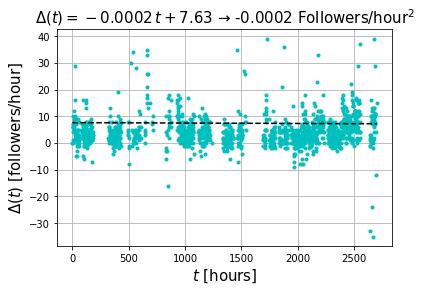

In [5]:
t=np.linspace(0,900)
dfl=df[df['Δf']<41]
plt.plot(dfl['hours'],dfl['Δf'],'c.')
ll,lle=optimize.curve_fit(line,df['hours'],df['Δf'],p0=[-0.1,15])
ml,bl=ll
plt.plot(df['hours'],line(df['hours'],ml,bl),linestyle='--',color='k')
#plt.plot(t,-0.01*t+10)
plt.title('$\Delta(t)=%s\\,t+%s$ → %s Followers/hour${}^2$' %(round(ml,4),round(bl,2),round(ml,4)),fontsize=15)
plt.ylabel('$\Delta(t)$ [followers/hour]',size=15)
plt.xlabel('$t$ [hours]',size=15)
plt.grid()

Prediction

$y=mx+b$ → $x=(y-b)/m$

In [17]:
def hours(y,m,b):
    return (y-b)/m

In [18]:
y=90000
h=int(round(hours(y,m,b),0))
h

7281

In [19]:
import datetime

In [20]:
t0=df.loc[0,'date_time']
print(f't0 → {t0}')
print(f'{t0+datetime.timedelta(hours=h)}')

t0 → 2021-12-29 20:59:26.236000
2022-10-29 05:59:26.236000


In [21]:
df['pred']=df['hours'].apply(lambda x: int(m*x+b)) 

Errores

In [22]:
Δm=np.sqrt(le[0,0])
Δb=np.sqrt(le[1,1])

In [23]:
m-Δm,m+Δm

(3.907829150300555, 3.9205938376582368)

In [24]:
b-Δb,b+Δb

(61492.02430773689, 61508.57795943795)

In [25]:
df.iloc[-1]['hours']+10*24

2700.2087483333216

## Cuadratic

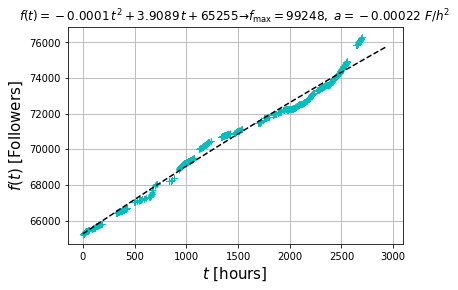

In [6]:
import pandas as pd
def curve(x,a,b,c):
    return a*x**2+b*x+c

df=pd.read_json('followers.json')
df=df.iloc[-1500:].reset_index(drop=True)
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])

#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )
plt.plot(df['hours'],df['followers'],'c+')


l,le=optimize.curve_fit(curve,df['hours'],df['followers'],p0=[0.1,8,40000])
a,b,c=l


#Fit:
p=np.poly1d([a,b,c])
v=p.deriv()
tmax=v.roots[0]
t=np.linspace(0,df.iloc[-1]['hours']+10*24)


plt.plot(t,curve(t,a,b,c),linestyle='--',color='k')
plt.title('$f(t)=%s\\,t^2+%s\\,t+%s \\to f_{\\rm{max}}=%s,\\ a=%s\\ F/h^2$ ' 
          %(round(a,4),round(b,4),int(c),int(p(tmax)),2*round(a,5)),fontsize=12)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
#plt.hlines(62000,-100,4000)
plt.savefig('followers.png')
#plt.xlim(3000,4500)
#plt.ylim(60000,64000)

In [7]:
import numbers
import datetime

In [8]:
pred=100000
PREDICTION=isinstance( (pred-p).roots[-1],numbers.Real )

In [9]:
fmax=float('inf')
if p.coefficients[0]<0:
    fmax=p(tmax)

In [10]:
v(df.hours.iloc[0:df.shape[0]:df.shape[0]//2])

array([3.9088821 , 3.52835084])

In [11]:
v(df.hours.iloc[0:df.shape[0]])

array([3.9088821 , 3.90865718, 3.90843226, ..., 3.30362457, 3.30156093,
       3.30133598])

Prediction:
$$F(t)=\frac{1}{2}at^2+v_0t+t_0$$

In [12]:
if PREDICTION:
    h=(pred-p).roots[-1]
    t0=df.loc[0,'date_time']
    print(f't0 → {t0}, t_end → {h}')
    print(f'{pred} folowers → {t0+datetime.timedelta(hours=h)}')
else:
    t=df.loc[0,'date_time']    
    print(f'{fmax} max followers → {t+datetime.timedelta(hours=tmax)}')

99248.10477681829 max followers → 2024-02-02 18:23:59.335951


In [13]:
pred=78000
h=(pred-p).roots[-1]
t0=df.loc[0,'date_time']
print(f't0 → {t0}, t_end → {h}')
print(f'{pred} folowers → {t0+datetime.timedelta(hours=h)}')

t0 → 2022-01-27 12:31:06.369000, t_end → 5042.3838733698185
78000 folowers → 2022-08-25 14:54:08.313131


In [ ]:
ggkkj

## Logistic

\begin{align}
f(x; \mu,s)  & = \frac{e^{-(x-\mu)/s}} {s\left(1+e^{-(x-\mu)/s}\right)^2} \\[4pt]
& =\frac{1}{s\left(e^{(x-\mu)/(2s)}+e^{-(x-\mu)/(2s)}\right)^2} \\[4pt]
& =\frac{1}{4s} \operatorname{sech}^2\left(\frac{x-\mu}{2s}\right).
\end{align}

In [78]:
from scipy import  misc
def logistic(x,A,μ,s):
    return A*np.exp( -(x-μ)/s  )/( s*(1 + np.exp( -(x-μ)/s  )   )  )**2

derivative=np.vectorize(misc.derivative)

df=pd.read_json('followers.json')

df['hours']=df['date_time'].apply(lambda t: (t.timestamp()-df.loc[0,'date_time'].timestamp())/3600  )


t=np.linspace(0,5000,1000)
p0=[20000,100,10]
l,le=optimize.curve_fit(logistic,df['hours'],df['followers'],p0=p0)
A,μ,s=l
l

array([2.93283857e+12, 4.30174009e+03, 3.42131016e+03])

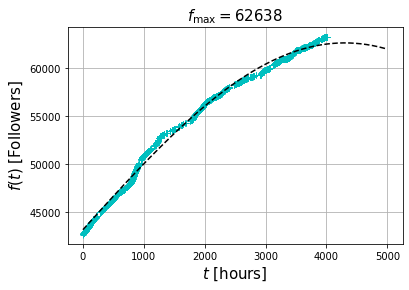

In [79]:
#df['hours']=df['date_time'].apply(lambda t: (t-df.loc[0,'date_time']).seconds/3600  )
plt.plot(df['hours'],df['followers'],'c+')

#fmax
dlogistic=derivative(lambda t: logistic(t,A,μ,s),t)
nt=dlogistic[dlogistic>0].shape[0]
lfmax=logistic( t[nt],A,μ,s ) 

#Fit:
plt.plot(t,logistic(t,A,μ,s),linestyle='--',color='k')
plt.title(r'$f_{\rm max}=%s$' %int(lfmax),fontsize=15)
plt.xlabel('$t$ [hours]',size=15)
plt.ylabel('$f(t)$ [Followers]',size=15)
plt.grid()
plt.savefig('followers.png')

In [80]:
optimize.curve_fit(logistic,df['hours'],df['followers'],p0=[100,1,1])

/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


(array([2.19682098e+12, 3.65612497e+03, 3.00886344e+03]),
 array([[1.94873469e+20, 1.63719228e+11, 1.23457036e+11],
        [1.63719228e+11, 1.42640640e+02, 1.02932126e+02],
        [1.23457036e+11, 1.02932126e+02, 7.83832268e+01]]))

In [81]:
t[nt]/24

152.4441107774441

In [170]:
import helium as hell
import pandas as pd
import time

In [26]:
df['followers'].sort_values().unique()

array([42696, 42706, 42716, ..., 56979, 56980, 56983])

In [28]:
pd.__version__

'1.3.0'